## Laptop Pricing Analysis
### Author: Brendan Molieri

## 1    Import & Load Dataset 
Source: Kaggle

In [27]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#Import dataset
data = pd.read_csv("laptop_price.csv", encoding='latin-1')

## 2    Understanding the dataset

In [28]:
df = pd.DataFrame(data)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## 2.1  Data Manipulation

In [29]:
'''
1. Remove Characters from 'Ram' Column
2. Remove 'kg' from weight
3. Strip 'Memory' column from type
4. Create new tab - 'memory_type'
5. Convert 'Price_euros' to dollar values

'''
### 1 - Strip 'GB' from 'Ram'
df['Ram'] = df['Ram'].map(lambda x: x.rstrip('GB'))

### 2 - Strip 'kg' from 'Memory'
df['Weight'] = df['Weight'].map(lambda x: x.rstrip('kg'))

### 3/4 - Strip 'Memory' Column
df['Memory'] = df['Memory'].str.split('GB', expand=True)[0]
df['Memory'] = df['Memory'].str.split('TB', expand=True)[0]

### 5 - Convert to dollars
df['Price_euros'] = df['Price_euros'].apply(lambda x: x*1.02)
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1366.4838
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,916.9188
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,586.5000
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2588.1990
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1839.6720


In [30]:
## 2.2 Basic Graph Exploration 

<AxesSubplot:>

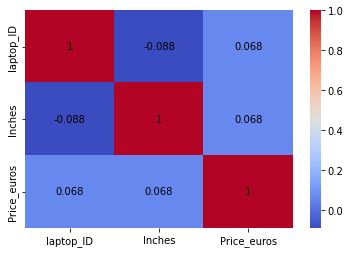

In [31]:

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',annot_kws = {'color':'black'})

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

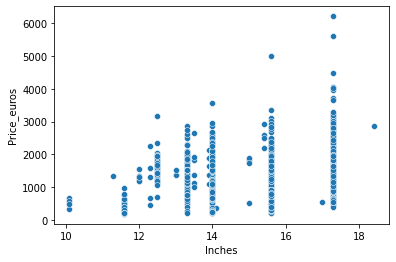

In [38]:
sns.scatterplot(x="Inches", y="Price_euros", data=df)